# Credit Risk Model Prediction ID/X Partners
Author: Rizki Dinata (June 2024)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import library and dataset

In [33]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from scipy.stats import chi2_contingency, f_oneway

In [3]:
os.chdir('/content/drive/MyDrive/Projects/credit-risk-idx')

In [4]:
!pwd

/content/drive/MyDrive/Projects/credit-risk-idx


In [5]:
#load data
df = pd.read_csv('idx_credit.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#display total rows and columns
df.shape

(466285, 75)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
#split categorical and numerical data
cat_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')

cats_col = cat_df.columns.to_list()
nums_col = num_df.columns.to_list()

In [ ]:
df[nums_col].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#display count unique value categorical data
for col in cats_col:
  print(df[col].value_counts())
  print('---'*30)

term
 36 months    337953
 60 months    128332
Name: count, dtype: int64
------------------------------------------------------------------------------------------
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
------------------------------------------------------------------------------------------
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64
------------------------------------------------------------------------------------------
emp_title
Teacher                              5399
Manager                       

# Data Preprocessing

In [ ]:
df_clean = df.copy()

## Drop Columns with Missing Values

In [ ]:
#check missing value with percentage and add style background

def missing_percentage(df):
  missing_values = df.isnull().sum()
  total_values = len(df)
  missing_percentage = (missing_values / total_values) * 100
  missing_df = pd.DataFrame({'column_name': df.columns,
                             'missing_values': missing_values,
                             'missing_percentage': missing_percentage
                              })
  missing_df = missing_df.sort_values('missing_percentage', ascending=False).reset_index(drop=True)
  missing_df['missing_percentage'] = missing_df['missing_percentage'].apply('{:.2f}'.format)
  return missing_df

result_missing = missing_percentage(df_clean)
result_missing.style.background_gradient(cmap='Reds', subset=['missing_percentage'])

,column_name,missing_values,missing_percentage
0,inq_last_12m,466285,100.00
1,total_bal_il,466285,100.00
2,dti_joint,466285,100.00
3,verification_status_joint,466285,100.00
4,annual_inc_joint,466285,100.00
5,open_acc_6m,466285,100.00
6,open_il_6m,466285,100.00
7,open_il_12m,466285,100.00
8,open_il_24m,466285,100.00
9,mths_since_rcnt_il,466285,100.00


In [ ]:
#drop feature or columns with missing value percentage more than 50

df_clean = df_clean.drop(columns=result_missing[result_missing['missing_percentage'].astype('float') > 50]['column_name'])


In [ ]:
df_clean.shape

(466285, 54)

## Impute Missing Values under 50%

In [ ]:
# define impute missing value if number input median value and if its object impute mode

def impute_missing_values(df):
  for col in df.columns:
    if df[col].dtype == 'number':
      df[col] = df[col].fillna(df[col].median())
    else:
      df[col] = df[col].fillna(df[col].mode()[0])
  return df

df_clean = impute_missing_values(df_clean)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   466285 non-null  object 
 12  emp_length                  466285 non-null  object 
 13  home_ownership

## Check Duplicate data

In [ ]:
df_clean.duplicated().sum()

0

## Check unique values

In [ ]:
print("Unique Values Numerical: \n")
df_clean.select_dtypes(include='number').nunique()

Unique Values Numerical: 



Unnamed: 0                    466285
id                            466285
member_id                     466285
loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
int_rate                         506
installment                    55622
annual_inc                     31901
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
out_prncp_inv                 141189
total_pymnt                   351609
total_pymnt_inv               347659
total_rec_prncp               172713
total_rec_int                 270249
total_rec_late_fee              5808
recoveries                     22773
collection_recovery_fee        20275
last_pymnt_amnt               198194
c

* `Unnamed: 0 `,`id`, `member_id` memiliki nilai yang berbeda pada tiap baris nya
* Sedangkan `policy_code` hanya memiliki 1 nilai unik saja pada keseluruhan data

In [ ]:
print("Unique Values Categorical: \n")
df_clean.select_dtypes(include='object').nunique()

Unique Values Categorical: 



term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64

* `emp_title`, `url`, `title` memiliki nilai unik yang banyak yaitu diatas 1000, dimana nilai ini sangat banyak untuk fitur yang bersifat kategorikal.
* `application_type` hanya memiliki 1 nilai unik
* `issue_d`, `last_pymnt_d`, `next_pymnt_d`, `last_credit_pull_d` merupakan fitur yang seharusnya bertipe **datetime** tetapi terdeteksi object pada database. Oleh karena itu, nanti nya fitur ini perlu diubah type data nya.

In [ ]:
df_clean['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

* Kita perlu menghapus whitespace pada fitur

In [ ]:
# delete whitespcae unique value in feature term

df_clean['term'] = df_clean['term'].apply(lambda x: x.strip())
df_clean['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
df_clean['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
df_clean['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [ ]:
df_clean['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
df_clean['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
df_clean['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
df_clean['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

## Define target variable

* `loan_status` akan menjadi target variabel pada proses kali ini
* Dikarenakan fitur ini memiliki 9 nilai unik, sehingga kita perlu regrup menjadi binary classification (2 classes)

In [ ]:
df_clean['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df_clean['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

* Bad loan (1) : `Charged Off`, `Default`, `Late (31-120 days)`, `Does not meet the credit policy. Status:Charged Off`, `Late (16-30 days)`
* Good loan (0) : `Fully Paid`, `Does not meet the credit policy. Status:Fully Paid`
* Uncertained loan (-1) : `Current`, `In Grace Period`
* Kita akan menggunakan Good loan (1) dan Bad loan (0) sebagai target binary classification
* Uncertained loan (-1) akan di hapus dari dataframe karena sedang proses masa pinjaman yang tidak dapat di klasifikasikan sebagai good atau bad.

In [ ]:
# Define dictionary for encoding target variable
target = {'Fully Paid':'Good loan',
          'Does not meet the credit policy. Status:Fully Paid':'Good loan',
          'Charged Off':'Bad loan',
          'Default':'Bad loan',
          'Late (31-120 days)':'Bad loan',
          'Does not meet the credit policy. Status:Charged Off':'Bad loan',
          'Late (16-30 days)':'Bad loan',
          'Current':'Uncertained loan',
          'In Grace Period':'Uncertained loan'}
# Mapping values in target column
df_clean['loan_status'] = df_clean['loan_status'].map(target)

df_clean['loan_status'].value_counts()

loan_status
Uncertained loan    227372
Good loan           186727
Bad loan             52186
Name: count, dtype: int64

In [ ]:
# drop loan status having value -1

df_clean = df_clean[df_clean['loan_status'] != 'Uncertained loan'].reset_index()
df_clean['loan_status'].value_counts()

loan_status
Good loan    186727
Bad loan      52186
Name: count, dtype: int64

In [ ]:
df_clean.shape

(238913, 55)

## Reformatting Datetime columns

In [ ]:
df_clean['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-00    2062
Oct-99    1890
Nov-00    1856
Oct-01    1848
Nov-99    1819
          ... 
Oct-58       1
Dec-60       1
May-62       1
Mar-65       1
Nov-56       1
Name: count, Length: 634, dtype: int64

In [ ]:
def date(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year - 100)
  return dt

In [ ]:
# The month which the loan was funded
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'], format='%b-%y')
df_clean['last_pymnt_d'] = pd.to_datetime(df_clean['last_pymnt_d'], format='%b-%y')
df_clean['last_credit_pull_d'] = pd.to_datetime(df_clean['last_credit_pull_d'], format='%b-%y')
df_clean['earliest_cr_line'] = pd.to_datetime(df_clean['next_pymnt_d'], format='%b-%y')
df_clean['earliest_cr_line'] = df_clean['earliest_cr_line'].apply(lambda x: date(x))

# display result
df_clean[['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']].tail()

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
238908,2014-01-01,2014-05-01,2014-10-01,2016-02-01
238909,2014-01-01,2014-11-01,2014-10-01,2016-02-01
238910,2014-01-01,2015-09-01,2016-01-01,2016-02-01
238911,2014-01-01,2014-12-01,2016-01-01,2016-02-01
238912,2014-01-01,2014-12-01,2015-04-01,2016-02-01


## Create new features

Pada proses kali ini kita akan membuat fitur baru:

* `credit_pull_year` = total tahun antara paling awal peminjam membuka credit (`earliest_cr_line`) dan terakhir menarik pinjaman kredit (`last_credit_pull_d`)
* `pyment_time` = total bulan antara pinjaman didanai (`issue_d`) dan terakhir membayar peminjaman (`last_pymnt_d`)

In [ ]:
# define function to create new features
def total_month(dt1, dt2):
  return (dt2.year - dt1.year) * 12 + (dt2.month - dt1.month)

def total_year(dt1, dt2):
  return dt2.year - dt1.year

In [ ]:
df_clean['credit_pull_year'] = df_clean.apply(lambda x: total_year(x['last_credit_pull_d'], x['earliest_cr_line']), axis=1)
df_clean['pyment_time'] = df_clean.apply(lambda x: total_month(x['issue_d'], x['last_pymnt_d']), axis=1)

# display result
df_clean[['credit_pull_year', 'pyment_time']].head()

,credit_pull_year,pyment_time
0,0,37
1,3,16
2,0,30
3,1,37
4,1,37


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238913 entries, 0 to 238912
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   index                       238913 non-null  int64         
 1   Unnamed: 0                  238913 non-null  int64         
 2   id                          238913 non-null  int64         
 3   member_id                   238913 non-null  int64         
 4   loan_amnt                   238913 non-null  int64         
 5   funded_amnt                 238913 non-null  int64         
 6   funded_amnt_inv             238913 non-null  float64       
 7   term                        238913 non-null  object        
 8   int_rate                    238913 non-null  float64       
 9   installment                 238913 non-null  float64       
 10  grade                       238913 non-null  object        
 11  sub_grade                   238913 non-

In [ ]:
df_clean.head()

,index,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_pull_year,pyment_time
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,2016-02-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,0,37
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Bad loan,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,2016-02-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Feb-16,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,3,16
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2016-02-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,0,30
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,2016-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,Feb-16,2015-01-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,1,37
4,5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2016-02-01,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,Feb-16,2015-09-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,1,37


## Save Cleaned Data

In [ ]:
# save cleaned data
df_clean.to_csv('idx_credit_clean.csv', index=False)
print('Saving data is done!!')

Saving data is done!!


**Data ini akan digunakan untuk Exploratory Data Analysis (EDA) untuk menemukan informasi tersembunyi dan bermanfaat**

# Exploratory Data Analysis (EDA)

## Target Variable
Loan status merupakan variabel target yang digunakan pada proses kali ini.

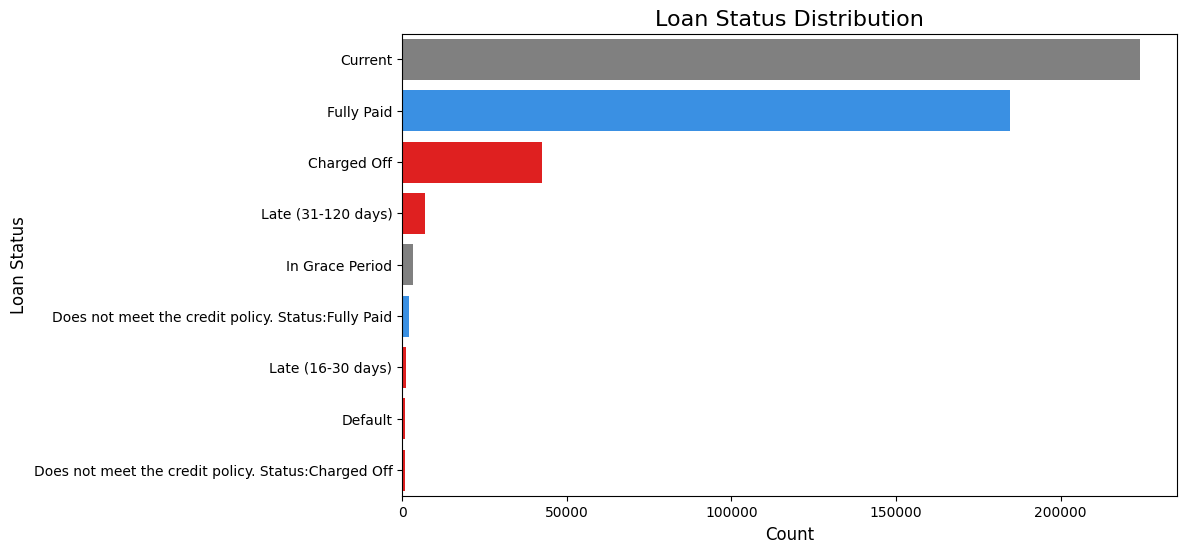

In [ ]:
# visualize loan status before transforming to binary classification
orders = df['loan_status'].value_counts().index

colors = ["dodgerblue" if stats in ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'] else
          "red" if stats in ['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off', 'Late (16-30 days)'] else
          "gray" for stats in orders]

plt.figure(figsize=(10, 6))

sns.countplot(y='loan_status', order=orders, palette=colors,  data=df)
plt.title('Loan Status Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)


plt.show()

Current dan In Grace Period akan di drop karena tidak bisa ditentukan sebagai Good loan atau Bad loan.

## Load cleaned data from storage

In [6]:
# load cleaned data
df_clean = pd.read_csv('idx_credit_clean.csv')
df_clean.head()

,index,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_pull_year,pyment_time
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,2016-02-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,0,37
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Bad loan,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,2016-02-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Feb-16,2013-09-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,3,16
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2016-02-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,Feb-16,2016-01-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,0,30
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,2016-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,Feb-16,2015-01-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,1,37
4,5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Good loan,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2016-02-01,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,Feb-16,2015-09-01,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15000.0,1,37


Profit from good loans: 382698243.22719336
Loss from bad loans: -166701734.100546 



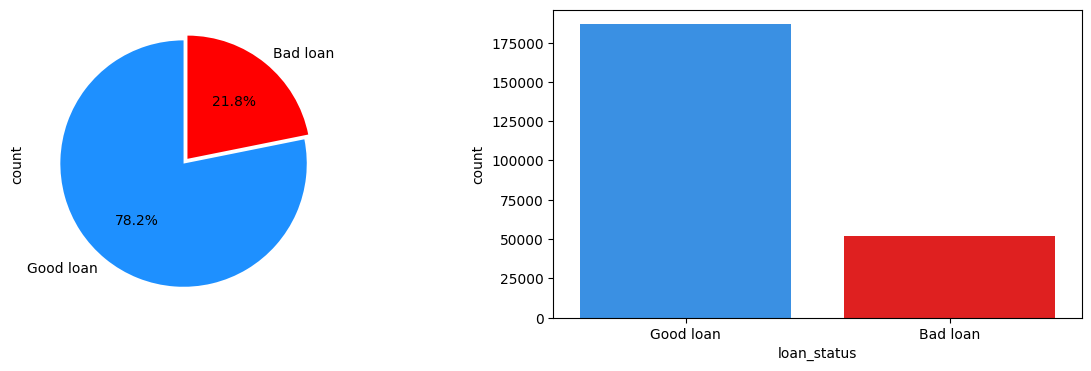

In [ ]:
# Calculate profit and loss for good and bad loans
good_loans = df_clean[df_clean['loan_status'] == 'Good loan']
bad_loans = df_clean[df_clean['loan_status'] == 'Bad loan']

good_loan_profit = good_loans['total_pymnt'].sum() - good_loans['total_rec_prncp'].sum()
bad_loan_loss = bad_loans['total_rec_prncp'].sum() - bad_loans['total_pymnt'].sum()

print(f"Profit from good loans: {good_loan_profit}")
print(f"Loss from bad loans: {bad_loan_loss} \n")

# create pie chart
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
df_clean['loan_status'].value_counts().plot(kind='pie',
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            explode=[0,0.05],
                                            colors=['dodgerblue','red'])

# create bar plot
plt.subplot(1,2,2)
sns.countplot(x='loan_status', data=df_clean, palette=['dodgerblue','red'])

plt.show()

* Berdasarkan distribusi loan status, terdapat imbalanced data dimana **78.2%** Good loan sedangkan **21.8%** Bad loan.
* Diperkirakan kentungan yang diperoleh dari Good loan yaitu **382,698,243** dan total kerugian dari Bad loan yaitu **-166,701,734**

## Plotting Function

In [ ]:
# 1. Define Barplot
def barplot_cust(data, x, y, palette=None, hue=None, order=None):
  plt.figure(figsize=(10, 6))
  sns.barplot(x=x, y=y, data=data, palette=palette, hue=hue, order=order)

  plt.title(f"{hue.replace('_',' ').title()} {y.replace('_',' ').title()} by {x.replace('_',' ').title()}")
  plt.xlabel(f"{x.replace('_',' ').title()}")
  plt.ylabel(f"{y.replace('_',' ').title()}")
  plt.legend(f"{hue.replace('_',' ').title()}")


# 2. Define Line plot
def lineplot_cust(data, x, y, hue=None, palette=None, ci=95):
  sns.lineplot(x=x, y=y, data=data, hue=hue, palette=palette, ci=ci)

  plt.title(f"{hue.replace('_',' ').title()} {y.replace('_',' ').title()} by {x.replace('_',' ').title()}")
  plt.xlabel(f"{x.replace('_',' ').title()}")
  plt.ylabel(f"{y.replace('_',' ').title()}")
  plt.legend(title=f"{hue.replace('_',' ').title()}", loc='best')


## Loan over years

In [ ]:
# change issue_d to datetime
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'])

# create new column year
df_clean['year'] = df_clean['issue_d'].dt.year

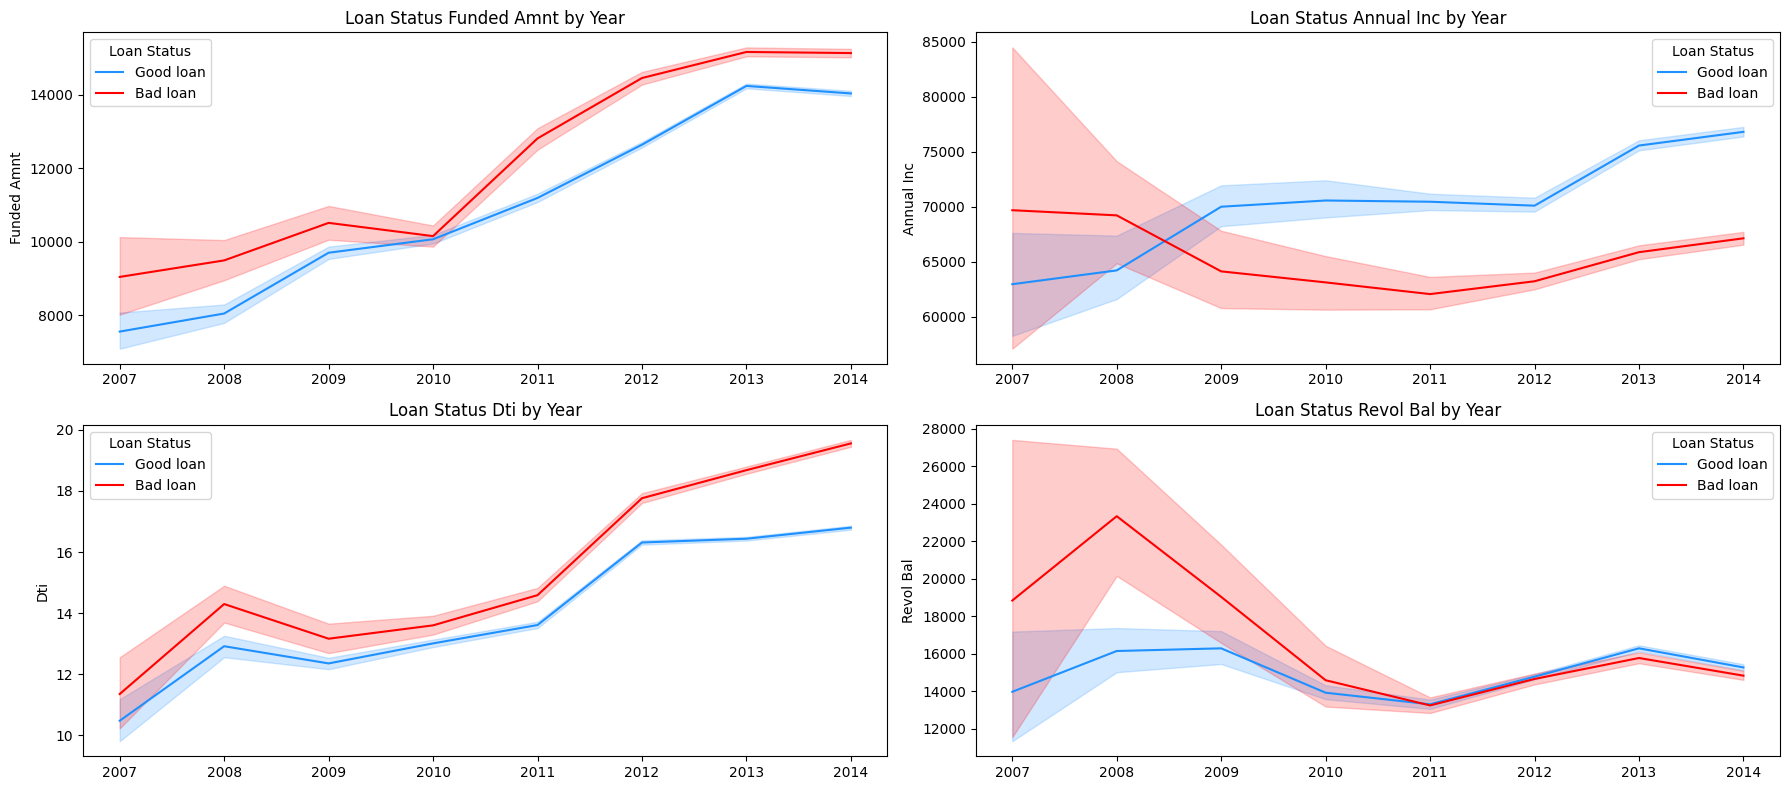

In [ ]:
plt.figure(figsize=(18, 8))

# Funded amnt by years
plt.subplot(2,2,1)
lineplot_cust(x='year', y='funded_amnt', data=df_clean, hue='loan_status', palette=['dodgerblue','red'])
plt.xlabel(None)

# Debt to income ratio by years
plt.subplot(2,2,3)
lineplot_cust(x='year', y='dti', data=df_clean, hue='loan_status', palette=['dodgerblue','red'])
plt.xlabel(None)

# annual income by years
plt.subplot(2,2,2)
lineplot_cust(x='year', y='annual_inc', data=df_clean, hue='loan_status', palette=['dodgerblue','red'])
plt.xlabel(None)

# Revolving balance by years
plt.subplot(2,2,4)
lineplot_cust(x='year', y='revol_bal', data=df_clean, hue='loan_status', palette=['dodgerblue','red'])
plt.xlabel(None)

plt.tight_layout()
plt.show()

* Funded Amount over years
  - Total pinjaman yang diberikan mengalami kenaikan dari tahun tahun ke tahun.
  - Total pinjaman yang diberikan pada Good loan lebih sedikit daripada pinjaman yang diberikan pada Bad loan
  - Pada tahun 2009 hingga 2010 pinjaman yang diberikan mengalami penurunan pada Bad loan tetapi pada tahun berikutnya mengalami peningkatan lagi

* Annual Income over years
  - Fitur ini menjelaskan pendapatan tahunan yang dilaporkan langsung dari klien.
  - Terdapat hal menarik disini dimana pendapatan Good loan lebih rendah dari Bad loan pada tahun 2007 hingga 2008. Tetapi pada tahun setelahnya pendapatan Good loan terus mengalami peningkatan.
  - Sedangkan pendapatan Bad loan walaupun lebih tinggi pada tahun 2007 - 2008 dari pendapatan Good loan, tetapi terus mengalami penurunan hingga memiliki selisih hingga 10,000 pada data terakhir.

* Debt to Income (DTI) over years
  - DTI merupakan rasio antara debt dan pendapatan
  - DTI terus mengalami peningkatan dari tahun ke tahun
  - DTI Bad loan lebih tinggi dari DTI Good loan.
  - Data ini menjelaskan bahwa pendapatan dari klien mengalami penurunan dan jumlah pinjaman yang yang terus peningkatan oleh klien Bad loan. Tetapi menurut beberapa sumber, DTI ini masih bisa di toleransi karena masih di bawa 36.

* Revolving Balance over years
  - Terjadi lonjakan tinggi Revol bal Bad loan pada tahun 2008 dan juga lebih tinggi dari Good loan sekitar 10,000. Ini juga menjelaskan dimana pendapatan tahunan(annual income) Bad loan masih tinggi pada tahun yang sama.
  - Kemudian pada tahun selanjutnya, revol bal Bad loan terus mengalami penurunan hingga mengikuti tren Revol bal Good loan.
  - Hal ini mengindikasikan bahwa klien berusaha mengurangi total Revol bal karena pendapatan yang menurun sehingga finansial nya tidak stabil.

* Dari data ini kita mengetahui bahwa klien Bad loan mengalami penurunan pendapatan tetapi kebutuhan mereka tetap naik. Kemudian klien Bad loan ingin mengurangi total hutang mereka secara perlahan dan juga akibat total hutang mereka yang bengkak pada tahun 2008.   
* Sedangkan klien Good loan walaupun pendapatan mereka terus naik, tapi jumlah revol balance mereka menyesuaikan dengan pendapatan mereka. Dimana bisa dlihat DTI mereka yang tidak ada lonjakan walaupun tren peningkatan terus terjadi. Tren peningkatan DTI ini hampir mengikuti tren pendapatan klien Good loan itu sendiri.

## Loan status by purpose

In [ ]:
# define function custom barplot
def barplot_cust(df, y, palette=None, num_top=5):
    cnt = df[y].value_counts()

    # Plot the countplot
    num_top = num_top
    palette = ['dodgerblue']*num_top + ['gray']*(len(cnt) - num_top)

    ax = sns.countplot(y=y, data=df, order=cnt.index, palette=palette)

    # Add the count labels to the bars

    for p in ax.patches:
        # Calculate label position
        width = p.get_width()
        x = width + 0.1  # Adjust offset as needed

        # Add the label
        ax.text(x, p.get_y() + p.get_height() / 2,
                '{:1.0f}'.format(width),
                ha="left", va="center", fontsize='small')
    plt.title(f"Distribution of {y.title()}")
    plt.xlabel('Count')
    plt.ylabel(y.title())


# define function stacked plot
def stacked_barplot(df, x, y, palette=None, order=None):
    # grouping by variable and loan status
    var = df.groupby(x)[y].value_counts().unstack()
    var = var.reindex(order)

    # calculate percentage
    var_pct = var.div(var.sum(axis=1), axis=0).mul(100)

    # Determine the order of the bars for stacking
    bar1 = plt.bar(var_pct.index,
                   var_pct['Good loan'],
                   label='Good loan',
                   color=palette[0])
    bar2 = plt.bar(var_pct.index,
                   var_pct['Bad loan'],
                   label='Bad loan',
                   color=palette[1],
                   bottom=var_pct['Good loan'])

    # Set the order of the stacked bars
    stack_order = ['Bad loan', 'Good loan']

    # Add labels to each bar segment
    for bar1, bar2 in zip(bar1, bar2):
        height1 = bar1.get_height()
        height2 = bar2.get_height()

        plt.text(bar1.get_x() + bar1.get_width() / 2,
                 height1 / 2,
                 '{:.1f}%'.format(height1),
                 ha='center',
                 va='center')

        plt.text(bar2.get_x() + bar2.get_width() / 2,
                 height1 + height2 / 2,
                 '{:.1f}%'.format(height2),
                 ha='center',
                 va='center')

    # Add label and set the order of the stacked bars
    plt.title(f"Default Rate by {x.replace('_', ' ').title()}", fontsize='large')
    plt.xlabel(f"{x.replace('_', ' ').title()}")
    plt.ylabel('Total Clients (%)')
    plt.legend(title=y.replace('_', ' ').title(), loc='best', bbox_to_anchor=(1.01, 1))

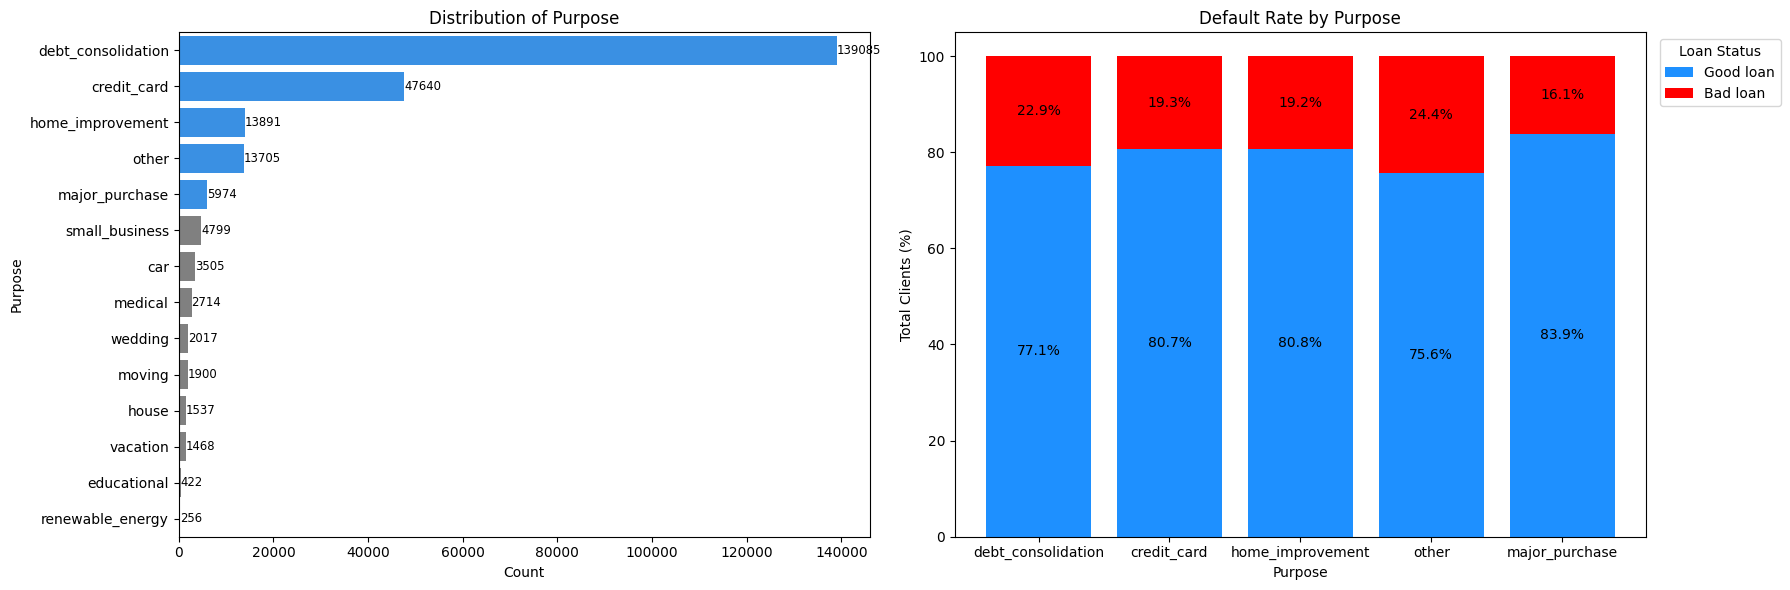

In [ ]:
# select top 5 purpose of loan
top_val = df_clean['purpose'].value_counts().head(5).index
top_purpose = df_clean[df_clean['purpose'].isin(top_val)]
order_purpose = top_purpose['purpose'].value_counts().index

# create figure
plt.figure(figsize=(18, 6))

# plot all purpose
plt.subplot(1,2,1)
barplot_cust(df=df_clean, y='purpose')

# plot percentage top 5 purpose
plt.subplot(1,2,2)
stacked_barplot(df=top_purpose, x='purpose', y='loan_status', order=order_purpose, palette=['dodgerblue','red'])

plt.tight_layout()
plt.show()

* Insight
  - Terdapat 5 kepentingan yang dilakukan klien untuk melakukan peminjaman yaitu debt consolidation, credit card, home improvement, other(lain-lain), dan major purchase
  - Major purchase memiliki tingkat Good loan yang tinggi yaitu 83.9%. Sedangkan tingkat Bad loan yang tinggi yaitu Other(kepentingan lain-lain)
  - Dikarenakan kepentingan tidak bisa kita tentukan secara spesifik, sehingga kita memilih tingkat Bad loan tertinggi setelah Other yaitu Debt consolidation yaitu 22.9%
  - Sehingga Debt Consolidation layak menjadi titik perhatian kita dikarenakan Debt consolidation juga merupakan kepentingan klien paling banyak untuk melakukan peminjaman yaitu sekitar 139,000

## Loan status by state

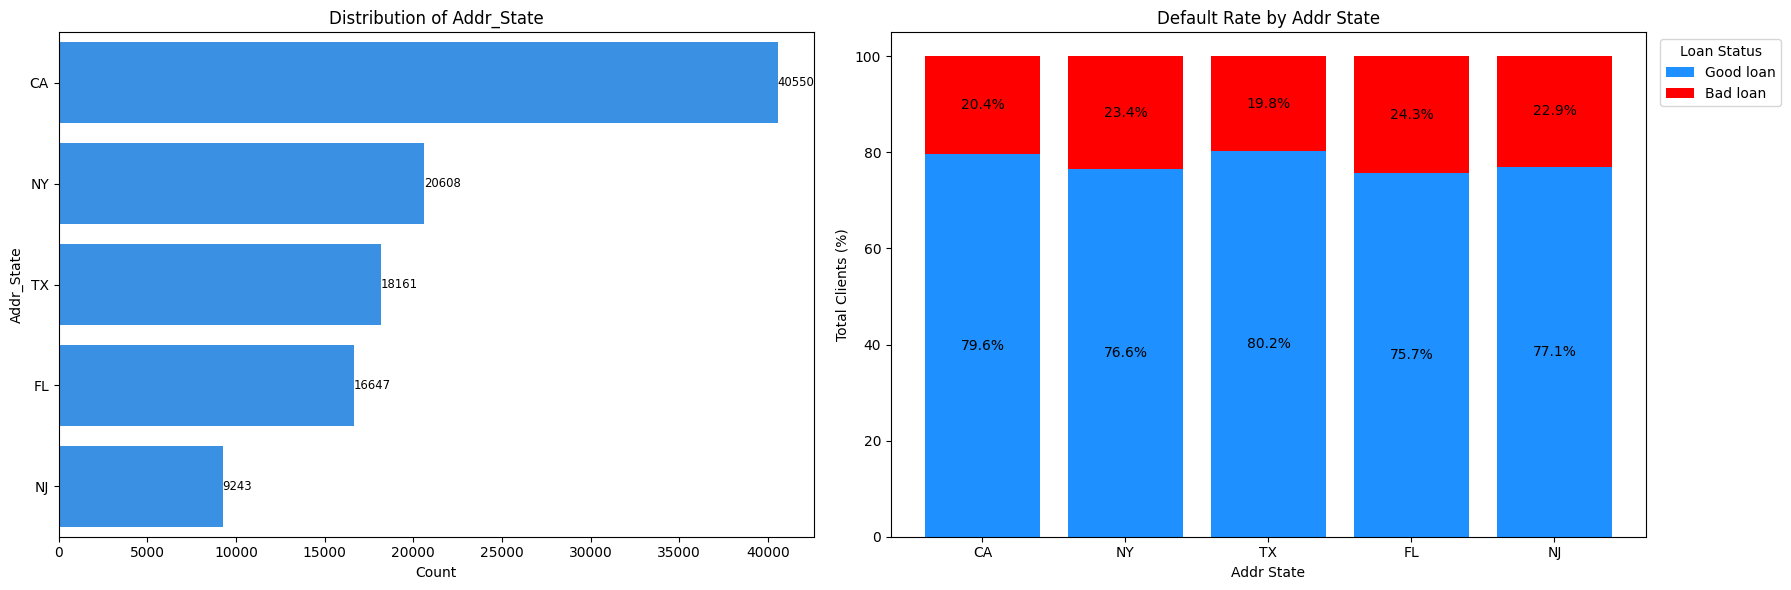

In [ ]:
# select top 5 states
top_state = df_clean['addr_state'].value_counts().head(5).index
top_state_df = df_clean[df_clean['addr_state'].isin(top_state)]
order_state = top_state_df['addr_state'].value_counts().index

plt.figure(figsize=(18, 6))

# plot by addr state
plt.subplot(1,2,1)
barplot_cust(df=top_state_df, y='addr_state')

# plot percentage by addr state
plt.subplot(1,2,2)
stacked_barplot(df=top_state_df, x='addr_state', y='loan_status', order=order_state, palette=['dodgerblue','red'])

plt.tight_layout()
plt.show()

* Insight
  - Terdapat 5 state tertinggi dimana lokasi asal klien yaitu CA (California), NY (New York), TX (Texas), FL (Florida), dan NJ (New Jersey).
  - Klien terbanyak berasal dari California yaitu **40550**
  - Tingkat rate Good loan tertinggi yaitu klien dari TX (Texas) yaitu **80.2%**
  - Sedangkan tingkat rate Bad loan tertinggi yaitu klien dari FL (Florida) yaitu **24.3%**

## Loan status by verification status

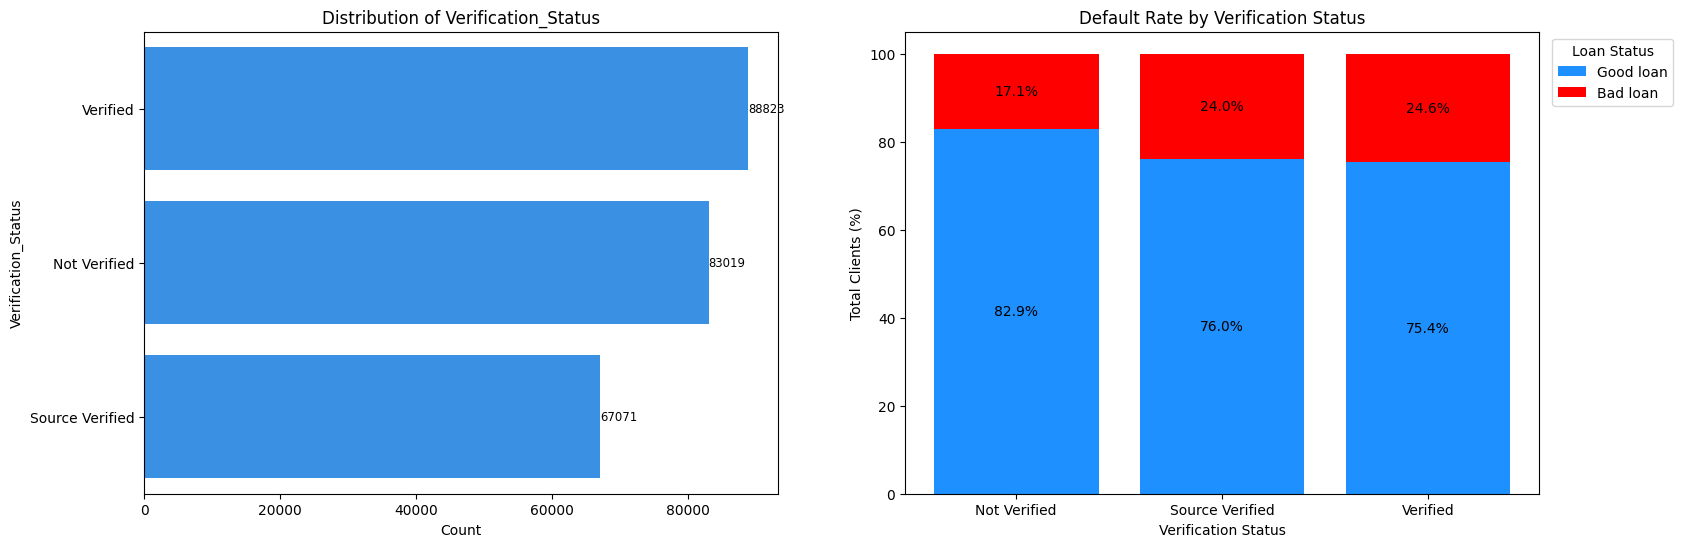

In [ ]:
# loan status by verification status


plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
barplot_cust(df=df_clean, y='verification_status')

plt.subplot(1,2,2)
stacked_barplot(df=df_clean, x='verification_status', y='loan_status', palette=['dodgerblue','red'])

* Insight
  - Klien yang pendapatan terverifikasi memiliki jumlah terbanyak yaitu **88,823**
  - Tetapi klien yang pendapatan terverifikasi pula memiliki tingkat rate Bad loan yang tertinggi yaitu **24.6%**
  - Sedangkan pendapatan (income) klien yang tak terverifikasi justru memiliki tingkat rate Bad loan yang paling rendah yaitu **17.1%**

## Loan status by Grade

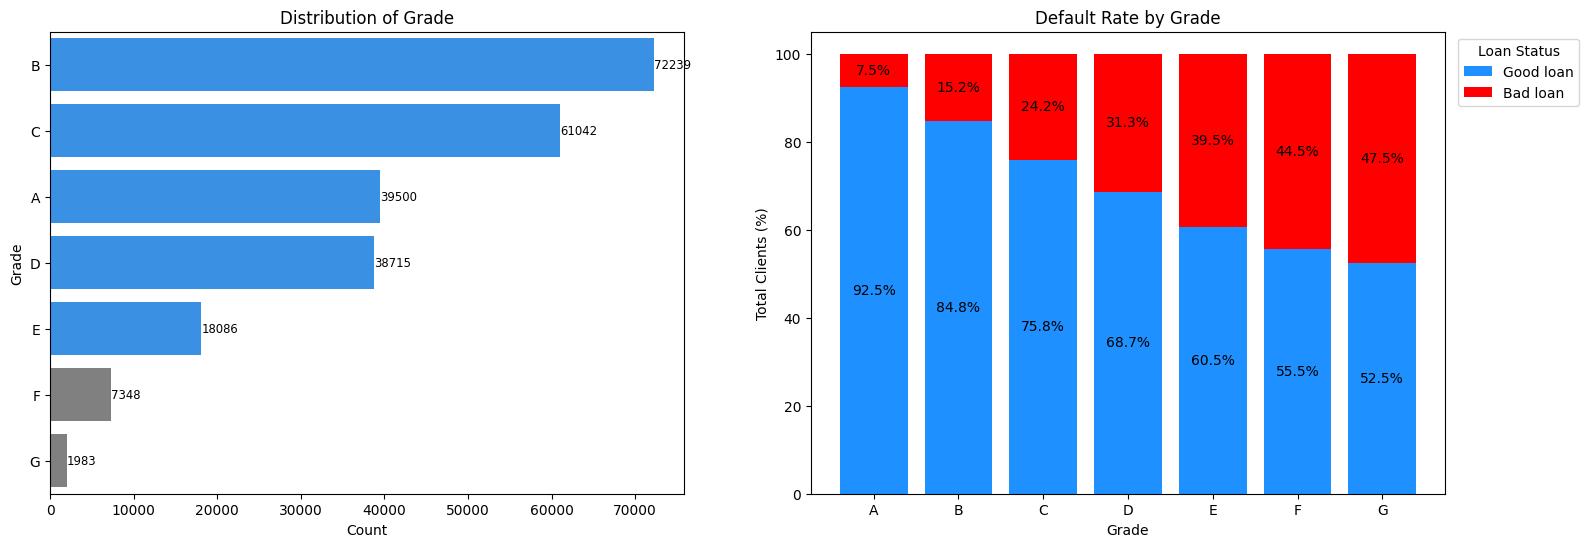

In [ ]:
# loan status by grade
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
barplot_cust(df=df_clean, y='grade')

plt.subplot(1,2,2)
stacked_barplot(df=df_clean, x='grade', y='loan_status', palette=['dodgerblue','red'])

* Insight
  - Klien dengan Grade B memiliki jumlah terbanyak yaitu **72,239**
  - Tingkat rate Bad loan tertinggi yaitu Grade G sekitar **47.5%**
  - Sedangkan tingkat rate Bad loan terendah yaitu Grade A sekitar **7.5%**
  - Hal ini menjelaskan bahwa tingkatan Grade klien semakin tinggi maka tingkat rate Bad loan semakin rendah.

## Loan status by employee length

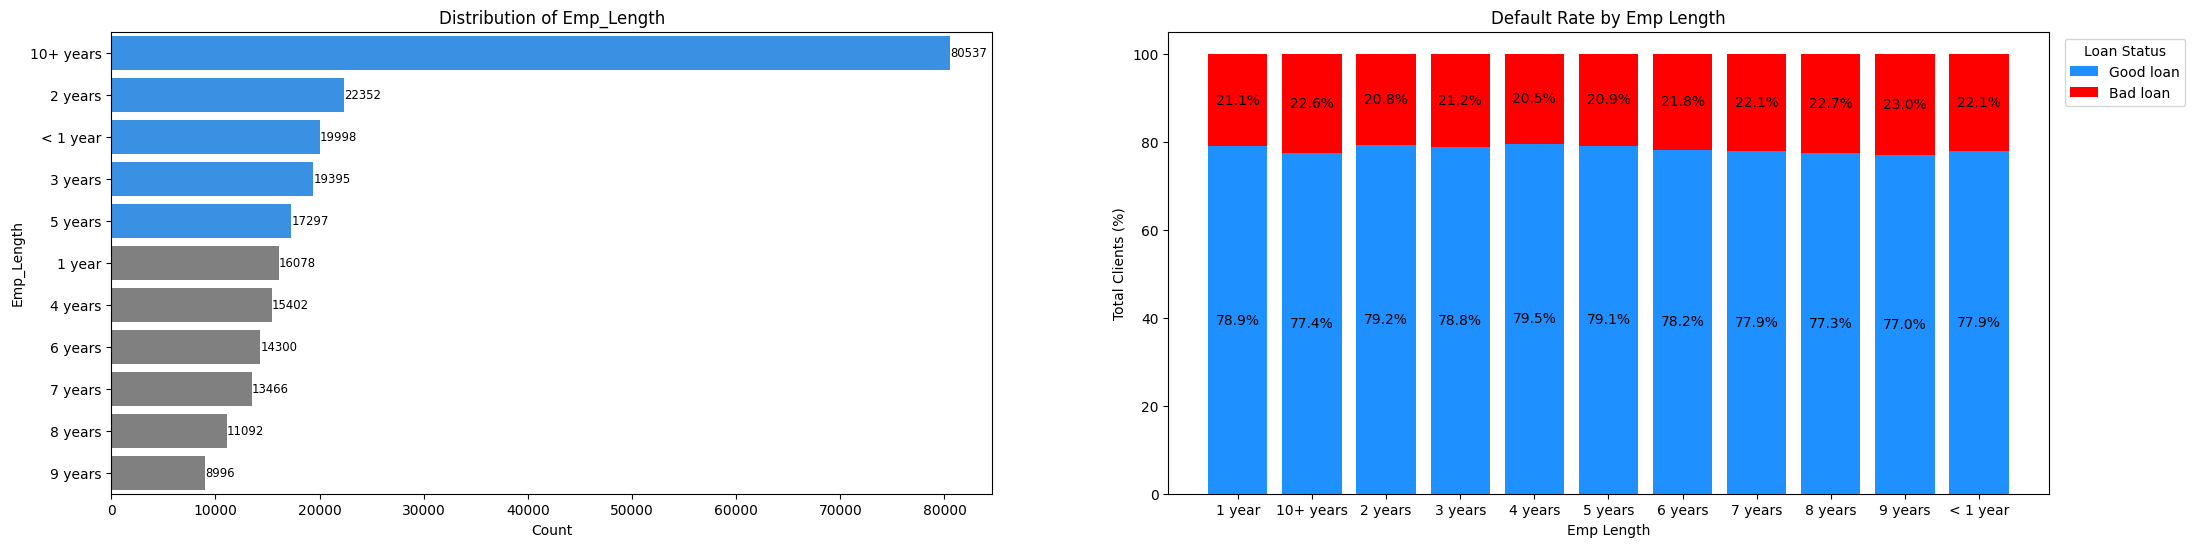

In [ ]:
# loan status by employee length
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
barplot_cust(df=df_clean, y='emp_length')

plt.subplot(1,2,2)
stacked_barplot(df=df_clean, x='emp_length', y='loan_status', palette=['dodgerblue','red'])

* Insight
  - Klien dengan lama masa kerja 10 tahun keatas memiliki jumlah klien terbanyak yaitu 80,537
  - Sedangkan tingkat rate Bad loan tidak jauh berbeda sekitar 21%

## Loan status by term

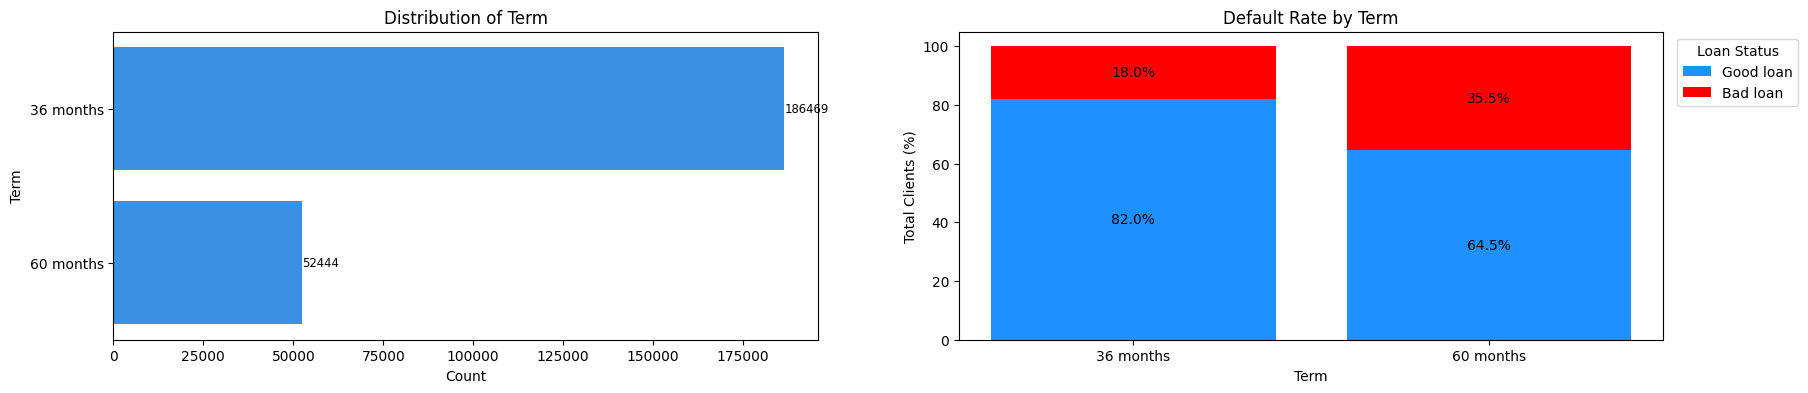

In [ ]:
# loan status by term
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
barplot_cust(df=df_clean, y='term')

plt.subplot(1,2,2)
stacked_barplot(df=df_clean, x='term', y='loan_status', palette=['dodgerblue','red'])

* Insight
  - Term 36 months memiliki jumlah klien tertinggi yaitu 186,469 atau lebih dari 60% klien memilih term 36 months (3 years)
  - Tingkat rate Bad loan tertinggi yaitu dengan term 60 months sekitar 35.5%.
  - Hal ini cukup menjelaskan bahwa semakin lama term yang ditentukan maka tingkat rate Bad loan pula semakin tinggi.

# Drop unnecessary Columns

In [13]:
un_col = [
    'index',
    'id',
    'member_id',
    'Unnamed: 0',
    'url',
    'title',
    'zip_code',
    'addr_state',
    'sub_grade',
    'emp_title',
    'pymnt_plan',
    'collections_12_mths_ex_med',
    'policy_code',
    'application_type',
    'out_prncp',
    'out_prncp_inv',
    'total_rec_prncp',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee'
    ]

col_date = [
    'issue_d',
    'last_pymnt_d',
    'last_credit_pull_d',
    'earliest_cr_line',
    'next_pymnt_d'
    ]

remove_col = un_col + col_date

df_cl = df_clean.copy()
df_cl = df_cl.drop(columns=remove_col, axis=1)

* Fitur `url`, `title`, `addr_state`, `sub_grade`, `emp_title` akan di drop bersamaan dengan kolom yang tidak diperlukan untuk modelling karena jumlah kategori yang terlalu banyak.
* Fitur datetime pula akan di drop pula karena jumlah nilai unik yang sedikit.

# Train Test Split

In [14]:
X = df_cl.drop(columns=['loan_status'])
y = df_cl[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (191130, 31)
X_test shape: (47783, 31)
y_train shape: (191130, 1)
y_test shape: (47783, 1)


# Feature Engineering

## Encoding Data

One Hot Encoding merupakan salah satu metode untuk mengkonversikan kolom yang bersifat kategori menjadi binary untuk mempermudah model machine learning dalam menganalisis dan memprediksi. One Hot Encoding merupakan library encodde yang telah di sediakan oleh Scikit-learn.\
Selain itu, encoding dapat juga dilakukan secara manual dengan membuat dictionary target encoding.

In [15]:
# defince function encoding data
def encoding_x(df):
  # Map grade
  grade_dict = {'A':6,
                'B':5,
                'C':4,
                'D':3,
                'E':2,
                'F':1,
                'G':0}
  df['grade'] = df['grade'].map(grade_dict)

  # map emp_length
  emp_length_dict = {'< 1 year':0,
                    '1 year':1,
                    '2 years':2,
                    '3 years':3,
                    '4 years':4,
                    '5 years':5,
                    '6 years':6,
                    '7 years':7,
                    '8 years':8,
                    '9 years':9,
                    '10+ years':10}
  df['emp_length'] = df['emp_length'].map(emp_length_dict)

  # map term
  term_dict = {'36 months':36,
               '60 months':60}
  df['term'] = df['term'].map(term_dict)

  # map home ownership and encoding with OHE -----------
  home_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
  df['home_ownership'] = df['home_ownership'].map(home_dict)

  # aggregate variable purpose and encoding eith OHE --------------
  purpose_dict = {'debt_consolidation':'debt_consolidation',
               'credit_card':'credit_card',
               'home_improvement':'private_use',
               'other':'other',
               'major_purchase':'major_purchase',
               'small_business':'small_business',
               'car':'private_use',
               'medical':'private_use',
               'wedding':'private_use',
               'moving':'private_use',
               'house':'private_use',
               'vacation':'private_use',
               'educational':'private_use',
               'renewable_energy':'other'}
  df['purpose'] = df['purpose'].map(purpose_dict)

  # Encoding with OHE
  var_ohe = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status']
  encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

  for var in var_ohe:
    # Fit and transform columns
    encoded_var = encoder.fit_transform(df[[var]])

    # Get new columns
    encoded_var_columns = encoder.get_feature_names_out([var])

    # Create new dataframe encoded columns
    encoded_df = pd.DataFrame(encoded_var, columns=encoded_var_columns, index=df.index)

    # merge real data with dataframe encoded
    df = pd.concat([df, encoded_df], axis=1)

    # Drop columns after encoded
    df.drop(var, axis=1, inplace=True)
  print('Encoding features success!')
  return df

def encoding_y(df):
    # map target
    lstatus = {'Good loan':0, 'Bad loan':1}
    df['loan_status'] = df['loan_status'].map(lstatus)

    print('Encoding target success!')
    return df

In [16]:
# Apply to data train
X_train = encoding_x(X_train)
y_train = encoding_y(y_train)

# Apply to data test
X_test = encoding_x(X_test)
y_test = encoding_y(y_test)

Encoding features success!
Encoding target success!
Encoding features success!
Encoding target success!


# Feature Selection

## Pearson test

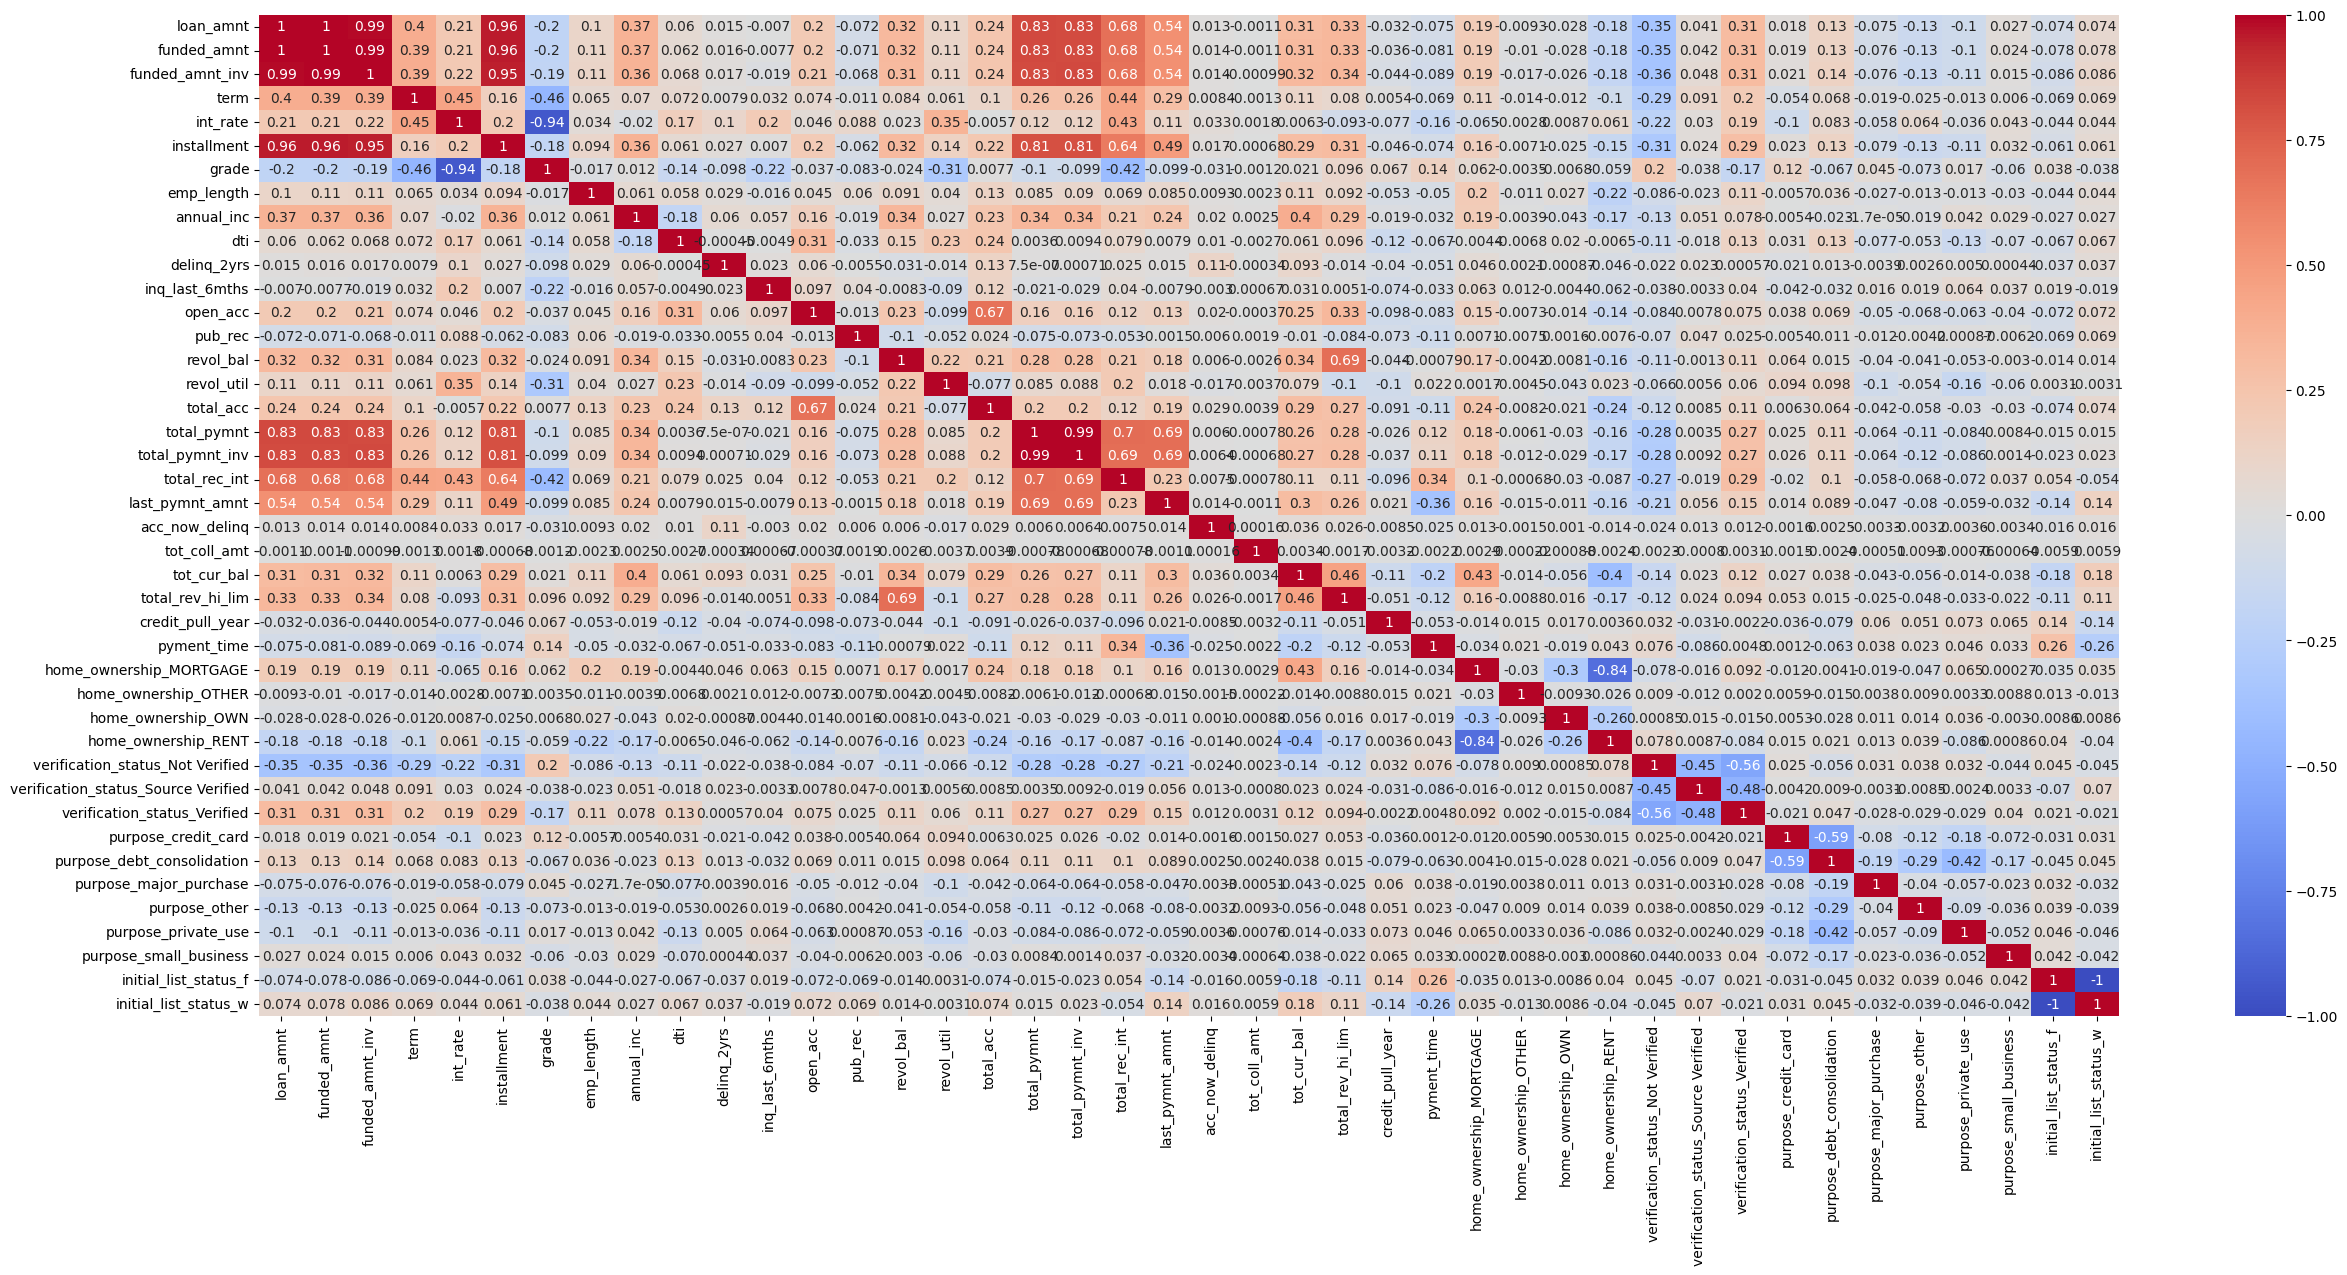

In [17]:
# correlation matrix
var_corr = X_train.corr()

plt.figure(figsize=(30,13))
sns.heatmap(var_corr, annot=True, cmap='coolwarm')
plt.show()

In [18]:
# drop multicolinearity columns
multi_cols = ['loan_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','total_rec_int','int_rate','total_rev_hi_lim']

# apply to data
X_train = X_train.drop(columns=multi_cols, axis=1)
X_test = X_test.drop(columns=multi_cols, axis=1)

Drop kolom multikolinearitas untuk mencegah kesalahan model dalam memprediksi koefisien hubungan antara variabel independen dan variabel dependen

## Detect outliers

In [19]:
def detect_outliers(df, cols):
  for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # outlier check
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.clip(df[col],lower_bound,upper_bound), df[col])

  return df

def box_outliers(df, cols, width=18, height=10):
  rows = (len(cols) - 1) // 9 + 1
  plt.figure(figsize=(width, height))

  for i, col in enumerate(cols, 1):
    plt.subplot(rows, 9, i)
    sns.boxplot(df[col], orient='v')
    plt.ylabel(None)
    plt.title(f"{col.title()}", fontsize='medium')
    plt.tight_layout()

  plt.show()


def outliers_kde(df, cols, width=18, height=10):
    num_rows = (len(cols) - 1) // 9 + 1

    plt.figure(figsize=(width, height))

    for i, col in enumerate(cols,1):
        plt.subplot(num_rows, 9, i)
        sns.kdeplot(df[col], fill=True, alpha=0.7)
        plt.title(col, fontsize="medium")
        plt.xlabel(None)
        plt.ylabel(None)
        plt.tight_layout()

    plt.show()

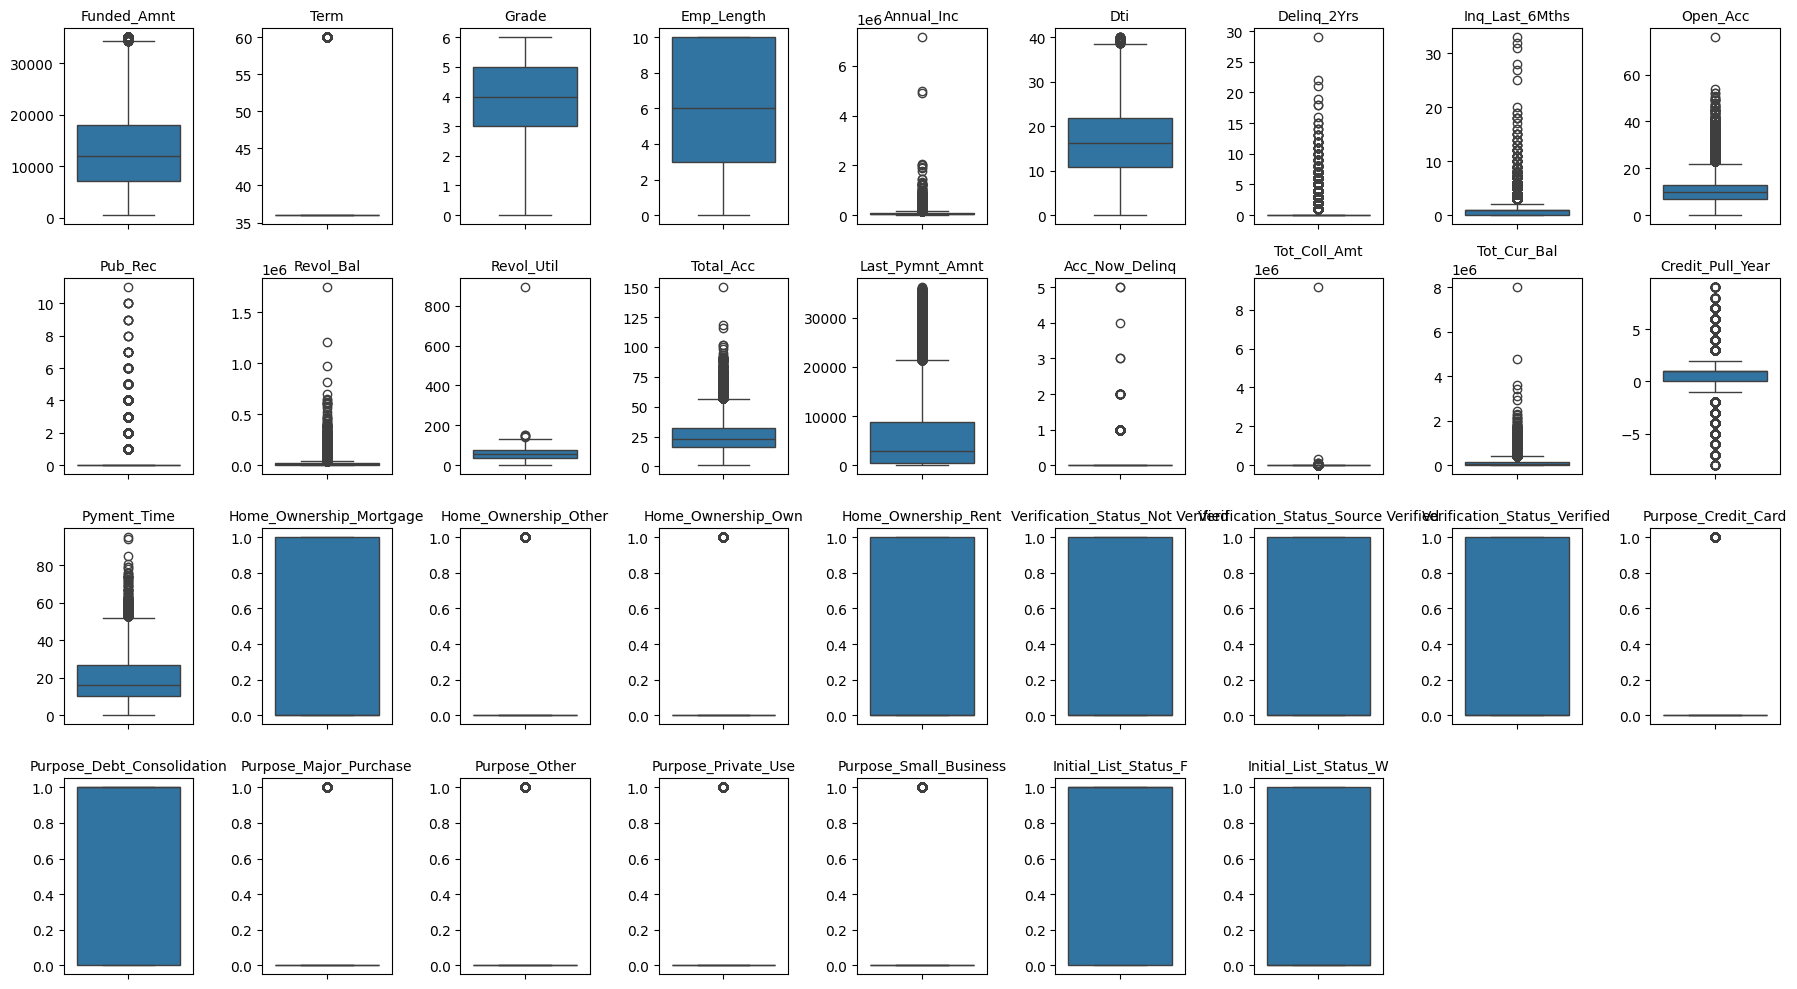

In [20]:
num_cols = X_train.select_dtypes(include='number').columns

# check box outliers
box_outliers(X_train, num_cols)

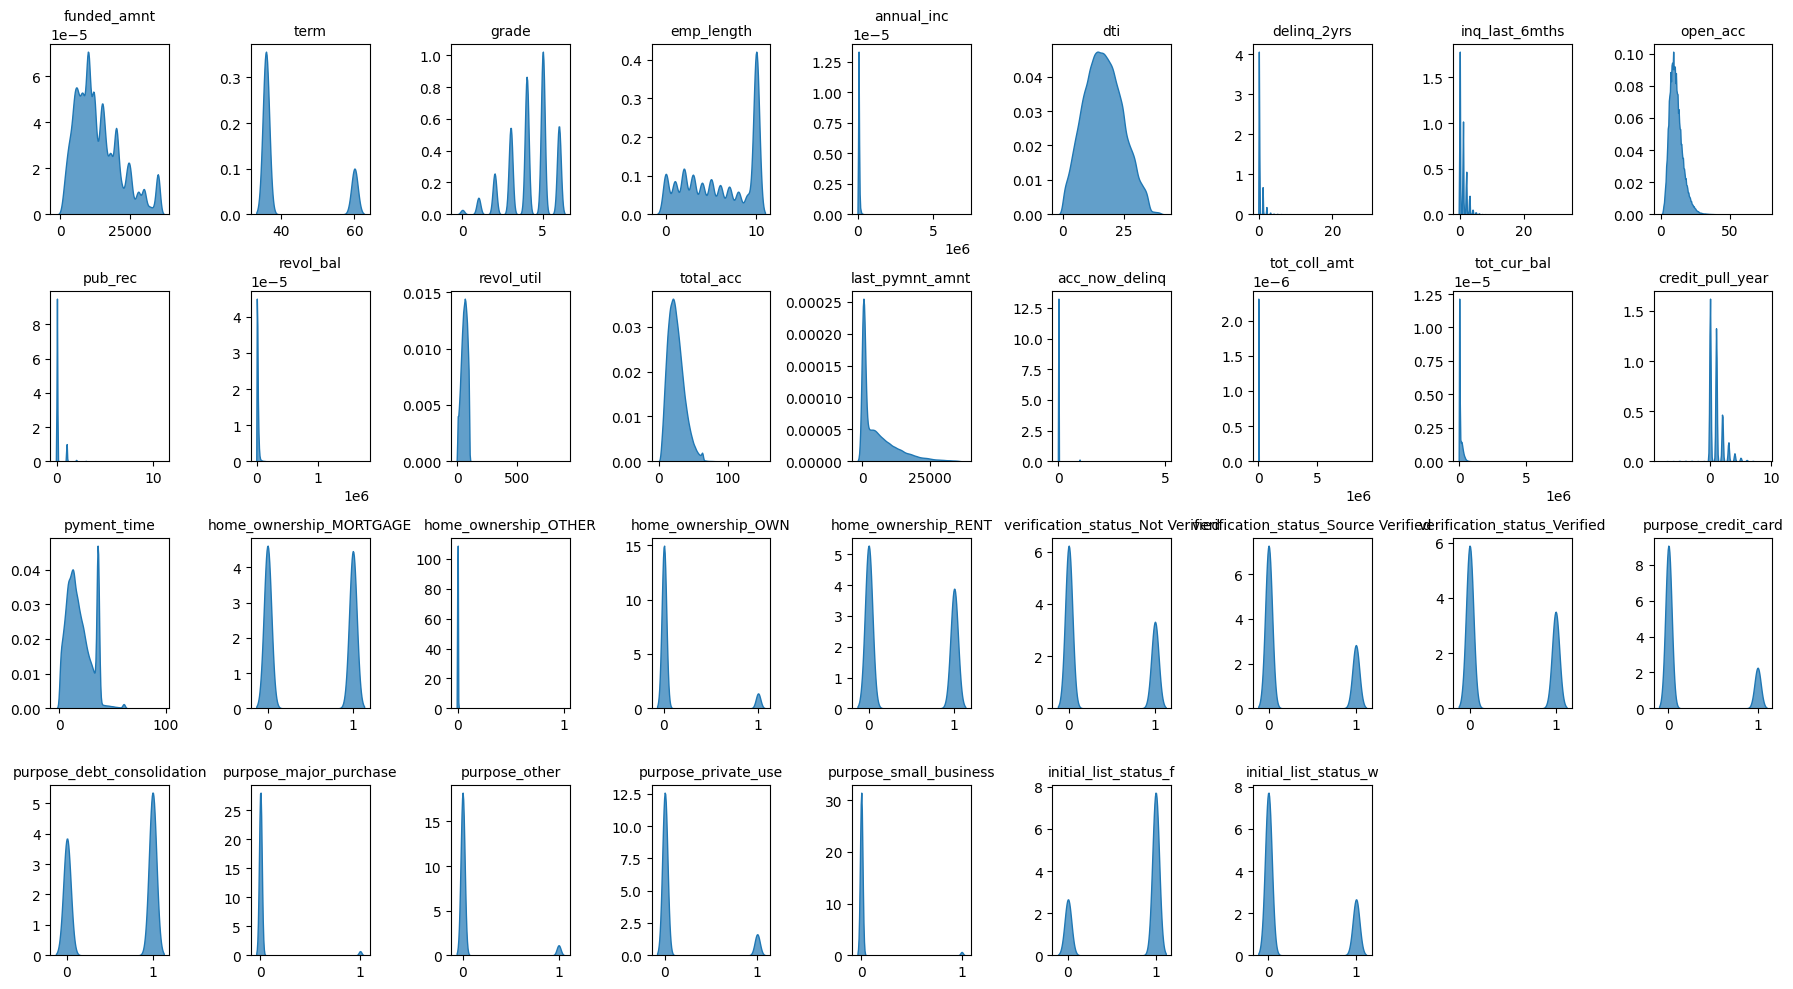

In [21]:
# check with kde
outliers_kde(X_train, num_cols)

In [22]:
# focus remove outliers on the features not new features after encoding
cols_target = ['annual_inc','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','tot_cur_bal','credit_pull_year','pyment_time','last_pymnt_amnt','acc_now_delinq','tot_coll_amt','total_acc']


X_train = detect_outliers(X_train, cols_target)

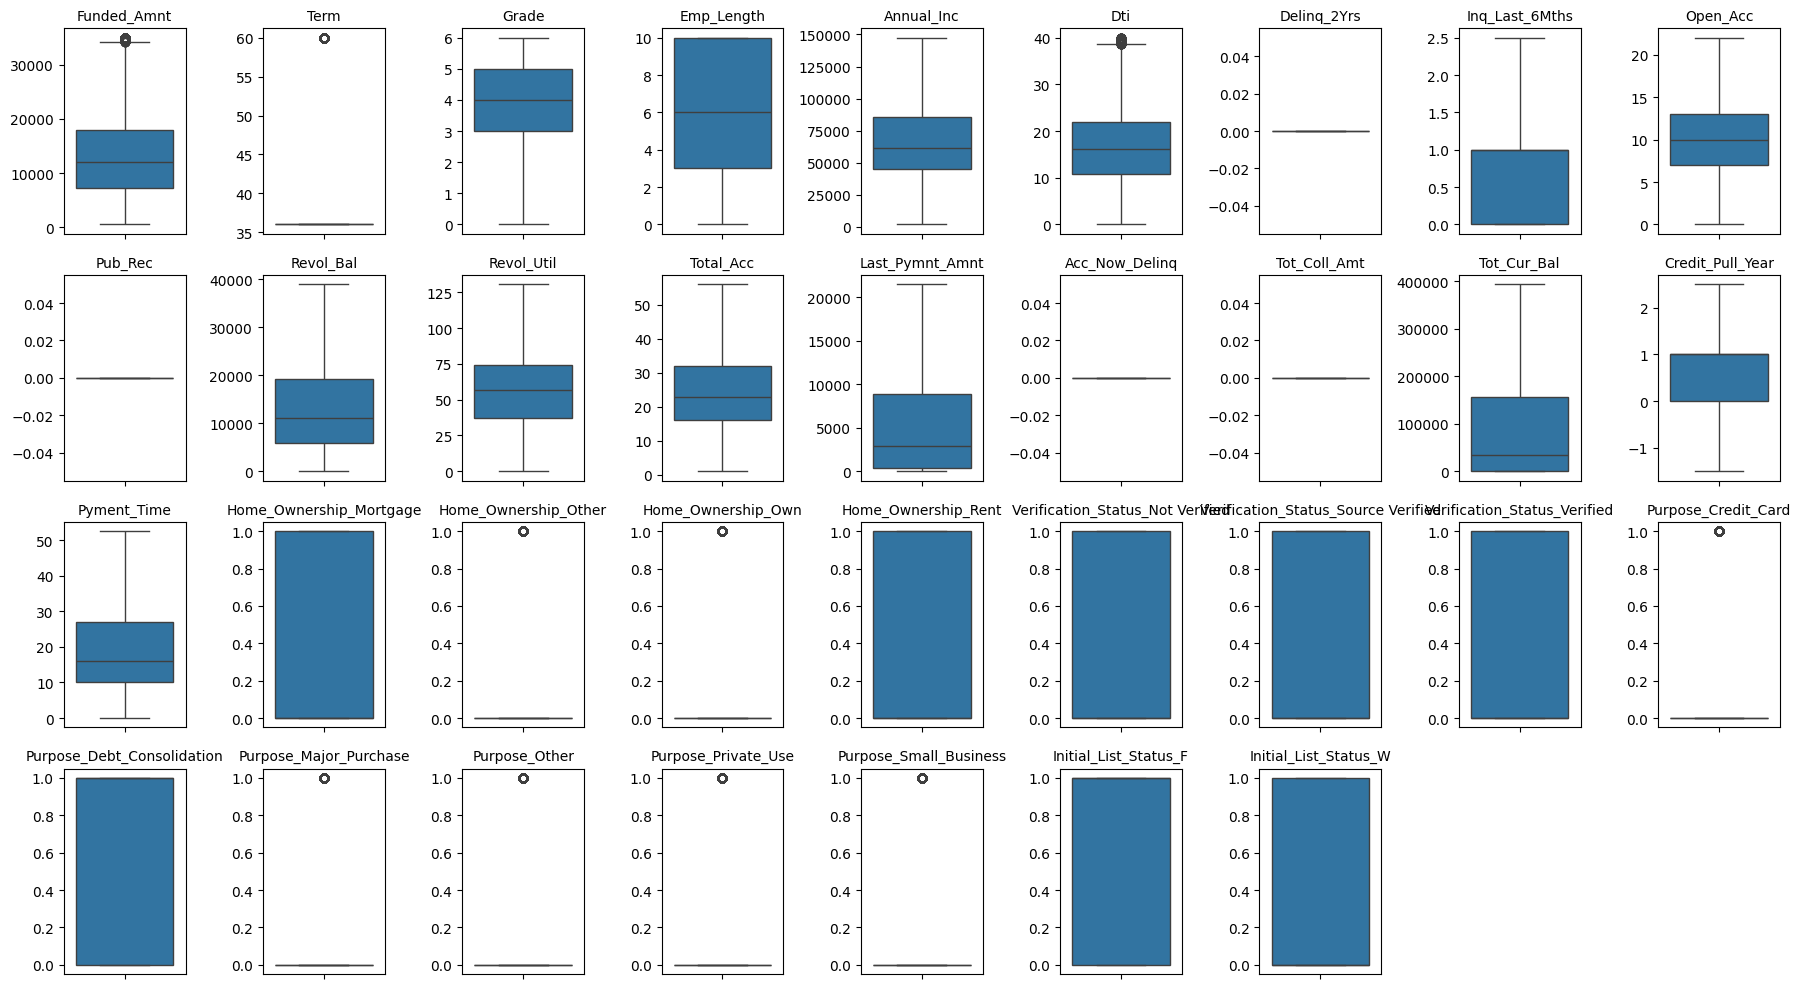

In [23]:
# check box outliers
box_outliers(X_train, num_cols)

Kita akan drop fitur yang bernilai 0

In [24]:
cols_drop = ['pub_rec', 'delinq_2yrs','acc_now_delinq', 'tot_coll_amt']

X_train = X_train.drop(columns=cols_drop, axis=1)
X_test = X_test.drop(columns=cols_drop, axis=1)

# Modelling

## Scaling Data (Standard scaler)
Standard scaler digunakan untuk transformasi skala range data fitur. Ini penting dilakukan agar semua fitur memiliki range nilai yang sama sehingga tidak fitur yang mendominasi dengan nilai tinggi sendiri yang dapat mempengaruhi model machine learning

In [25]:
scaler = StandardScaler()

# apply to data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# reset column and index
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
print(f"Scaling data success!")
X_train_scaled.sample(4)

Scaling data success!


,funded_amnt,term,grade,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_pymnt_amnt,tot_cur_bal,credit_pull_year,pyment_time,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
94495,0.192165,-0.530521,0.601820,1.112628,2.337407,0.714181,1.898785,1.381954,2.427256,1.327643,1.426209,-0.338078,2.577463,0.210022,1.021808,1.017183,-0.030788,-0.30261,-0.857408,1.370713,-0.623631,-0.770679,-0.499379,-1.180438,-0.159521,-0.248995,2.778817,-0.144156,0.586473,-0.586473
178170,-0.677370,-0.530521,0.601820,1.112628,-0.291745,-1.145429,0.218204,-1.499705,-1.044689,-0.322940,-1.117711,0.274665,-0.652733,-0.941105,-1.133889,-0.983107,-0.030788,-0.30261,1.166306,1.370713,-0.623631,-0.770679,-0.499379,-1.180438,-0.159521,4.016144,-0.359865,-0.144156,-1.705107,1.705107
33176,0.105212,-0.530521,-0.889321,-0.537228,-0.009338,-0.356622,1.338591,-0.391375,0.953189,1.457418,-1.029990,-0.875242,-0.792069,1.936712,-0.325503,1.017183,-0.030788,-0.30261,-0.857408,-0.729547,-0.623631,1.297558,-0.499379,0.847143,-0.159521,-0.248995,-0.359865,-0.144156,0.586473,-0.586473
180817,0.307068,-0.530521,1.347391,-1.362157,0.190471,0.701185,-0.902183,1.160288,-1.196491,-2.083021,0.899881,0.089678,-0.351095,0.210022,-0.415323,-0.983107,-0.030788,-0.30261,1.166306,-0.729547,-0.623631,1.297558,-0.499379,0.847143,-0.159521,-0.248995,-0.359865,-0.144156,0.586473,-0.586473


## Resampling with Oversampling SMOTE

SMOTE digunakan untuk menambah nilai minoritas agar bernilai sama dengan mayoritas. Oleh karena itu proses ini disebut sebagai Oversampling

In [26]:
smote = SMOTE(random_state=42)

# apply to data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Before sample shape: {y_train.value_counts()}\n")
print(f"After shape: {y_train_smote.value_counts()}")

Before sample shape: loan_status
0              149381
1               41749
Name: count, dtype: int64

After shape: loan_status
0              149381
1              149381
Name: count, dtype: int64


## Define evaluate function

In [45]:
# define function model evaluation
def model_evaluation(model, X_train, y_train, X_test, y_test):
  # train model
  model.fit(X_train, y_train)

  # predict
  y_test_pred = model.predict(X_test)

  # ROC AUC score
  y_test_proba = model.predict_proba(X_test)[:,1]
  y_train_proba = model.predict_proba(X_train)[:,1]

  train_auc = roc_auc_score(y_train, y_train_proba)
  test_auc = roc_auc_score(y_test, y_test_proba)

  # accuracy score
  test_acc = accuracy_score(y_test, y_test_pred)

  # recall score
  test_recall = recall_score(y_test, y_test_pred)

  # precision score
  test_precision = precision_score(y_test, y_test_pred)

  # f1 score
  test_f1 = f1_score(y_test, y_test_pred)

  # cross validation
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

  # gather all
  model_eval = {
      'Model': model.__class__.__name__,
      'Accuracy test': test_acc,
      'Recall test': test_recall,
      'Precision test': test_precision,
      'F1 test': test_f1,
      'ROC AUC train': train_auc,
      'ROC AUC test': test_auc,
      'Cross Validation': cv_score.mean()
  }

  df_eval = pd.DataFrame(model_eval, index=[0])

  return df_eval



# define function custom confusion matrix
def cust_confusion_matrix(model, X_test, y_test, threshold=0.5):
  y_proba = model.predict_proba(X_test)[:,1]
  y_pred = np.where(y_proba > threshold, 1, 0)

  cm = confusion_matrix(y_test, y_pred)
  cm_percent = cm / cm.sum()

  labels = np.array([['TP','FP'],['FN','TN']])
  labels = np.array([f'{v1}\n{v2} ({percent:.2%})' for v1, v2, percent in zip(labels.flatten(), cm.flatten(), cm_percent.flatten())]).reshape(2,2)

  plt.figure(figsize=(6,6))
  sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
              annot_kws={'size':'small','weight':'bold'},
              xticklabels=['Good loan','Bad loan'],
              yticklabels=['Good loan','Bad loan'])


  plt.xlabel('Predicted',fontsize='large')
  plt.ylabel('Actual',fontsize='large')
  plt.title('Confusion Matrix')
  plt.show()

# define function roc curve
def cust_roc_curve(model, X_test, y_test):
  # roc auc score
  y_proba = model.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_proba)

  auc = roc_auc_score(y_test, y_proba)

  ax.plot(fpr,tpr, label=f"{model.__class__.__name__} AUC = {auc:.2f}")

## Training Models

In [12]:
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(max_depth=6,random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42)
]

In [35]:
# evaluate models
result = []

for model in models:
  df_eval = model_evaluation(model, X_train_smote, y_train_smote, X_test_scaled, y_test)
  result.append(df_eval)

# display
results_model = pd.concat(result, axis=0).reset_index(drop=True)
results_model


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 149381, number of negative: 149381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4368
[LightGBM] [Info] Number of data points in the train set: 298762, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 119505, number of negative: 119504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4394
[

,Model,Accuracy test,Recall test,Precision test,F1 test,ROC AUC train,ROC AUC test,Cross Validation
0,LogisticRegression,0.939623,0.940021,0.812842,0.871818,0.978058,0.973867,0.978035
1,RandomForestClassifier,0.943243,0.952285,0.817823,0.879947,0.988281,0.979278,0.988461
2,KNeighborsClassifier,0.810979,0.829261,0.544169,0.657126,0.994608,0.883321,0.958891
3,XGBClassifier,0.971538,0.955734,0.917410,0.936180,0.999116,0.993516,0.998107
4,LGBMClassifier,0.967499,0.955830,0.901337,0.927784,0.998127,0.992374,0.997481


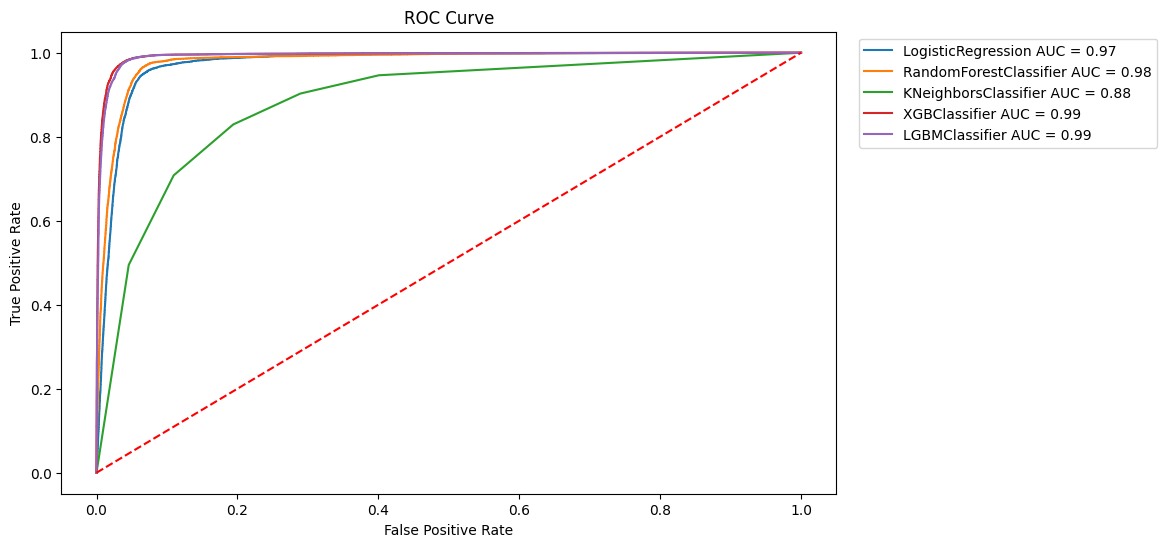

In [47]:
# plot roc curve
fig, ax = plt.subplots(figsize=(10,6))

for model in models:
  cust_roc_curve(model, X_test_scaled, y_test)

ax.plot([0,1], [0,1], 'r--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(bbox_to_anchor = (1.02,1), loc='upper left')
plt.show()

- `Summary:`
  Berdasarkan tabel evaluasi model, model machine learning dengan performa terbaik yaitu `XGBClassifier`.
- Nilai rata-rata dari masing-masing metrics sekitar **0.90** atau **90%**, nilai ini tergolong sangat tinggi
- Kita bisa menggunakan Hyperparameter tunning untuk memperoleh performa terbaik. Karena nilai metrics model kita sudah jauh lebih baik, kita bisa skip tahapan Hyperparameter tunning.

## Hyperparameter tunning

In [ ]:
# you can run this code to get optimal parameters. Because my device has limitation, its take more time than usual.

# # XGBoost model
# model = xgb.XGBClassifier(random_state=42)

# # Hyperparameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 150],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }
# # scorer
# roc_auc = make_scorer(roc_auc_score, needs_proba=True)

# # Grid search with cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=roc_auc)
# grid_search.fit(X_train_smote, y_train_smote)

# # Best model
# best_model = grid_search.best_estimator_
# print("Best model:", best_model)

# # Best parameters
# print("Best parameters:", grid_search.best_params_)

## Top Importance Feature

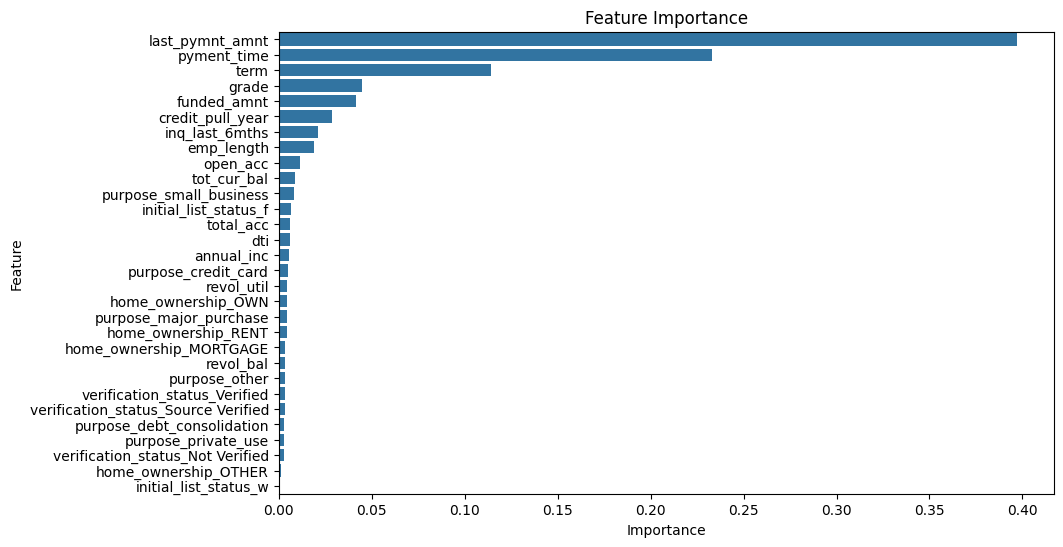

In [39]:
best_model = XGBClassifier(random_state=42)
best_model.fit(X_train_smote, y_train_smote)

feature_importance = best_model.feature_importances_

# get features name
df_importance = pd.DataFrame({'Feature': X_train_smote.columns, 'Importance': feature_importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=df_importance)
plt.title('Feature Importance')
plt.show()

Terdapat top 4 feature importances:
  
  1. `last_pymnt_amnt`: Fitur ini menjelaskan bahwa jumlah total pembayaran terakhir yang telah diterima dari klien. Fitur ini jelas membantu dalam mengindikasikan Good loan atau Bad loan karena jika total pembayaran yang macet atau tidak sesuai dapat mengkategorikan bahwa klien tersebut merupakan Bad loan.  
  2. `pyment_time`: Fitur ini jumlah bulan klien dari mulai klien diberi dana hingga terakhir klien membayar pinjaman nya. Ini mengindikasikan jika klien tidak tepat waktu maka klien tersebut merupakan Bad loan
  3. `term`: Fitur ini jangka waktu yang diambil klien dalam tenggat membayar seluruh pinjaman nya.
  4. `grade`: Fitur ini membantu LC dalam memberi penilaian atau rating pada Klien dari yang rating tinggi hinggan rating yang buruk.

## Confusion Matrix

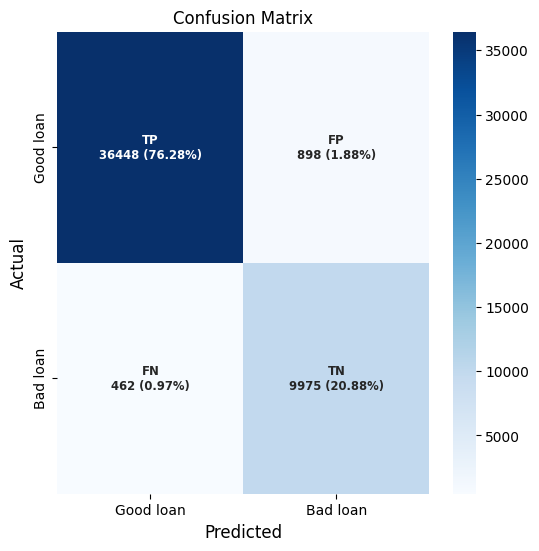

In [46]:
# plot confusion matrix
cust_confusion_matrix(best_model, X_test_scaled, y_test)

Dalam melihat nilai confusion matrix, biasanya pada model klasifikasi yang perlu diperhatikan yaitu FN (False Negative).

Nilai FN dari hasil model ini yaitu sangat kecil dari keseluruhan data yaitu `0.97%` atau berjumlah `462`.

Metric untuk memperhatikan nilai FN ini yaitu `Recall score`. **Recall score** pada model `XGBClassifier` bernilai 0.95 atau 95% yang mana nilai ini sangat baik.